In [8]:
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'
model_path='weights/icon_detect/model.pt'

som_model = get_yolo_model(model_path)

som_model.to(device)
print('model to {}'.format(device))

model to cuda


omniparse = (trained yolo + OCR) + caption model

OCR = detection model + recognition model...

In [2]:
# two choices for caption model: fine-tuned blip2 or florence2
import importlib
# import util.utils
# importlib.reload(utils)
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- modeling_florence2.py
. Make s

AttributeError: 'DaViT' object has no attribute '_initialize_weights'

In [4]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [48]:
# # reload utils
# import importlib
# import utils
# importlib.reload(utils)

# reload utils
import importlib
import util.utils as utils
importlib.reload(utils)
from PIL import Image

# from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'
image_path = 'lzy/test.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)



image size: (2402, 1549)


需要看看这里的参数才行：

easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)

imgsz = None

In [43]:

from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 
print('ocr_bbox_rslt:', ocr_bbox_rslt)

ocr_bbox_rslt: ([') GitHub - JaidedAl/EasyO', 'github.com/JaidedAl/EasyOCR', 'Relaunch to', ' Apache-2.0 license', "[469, 75], [469, 165], [189, 165]], 'i3', 0.3754989504814148),", "[134, 80], [134, 128], [86, 128]], '', 0.40452659130096436),", '([[517, 81],', "[565, 81], [565, 123], [517, 123]], ', 0.9989598989486694),", '([[78, 126],', "[136, 126], [136, 156], [78, 156]], '315', 0.8125889301300049),", '126],', '[574, 126],', "[574, 156], [514, 156]], '309', 0.4971577227115631),", "([[226, 170], [414, 170], [414, 220], [226, 220]], 'Yuyuan Rd.', 0.8261902332305908),", "([[79, 173], [125, 173], [125, 213], [79, 213]], 'W', 0.9848111271858215),", "([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.8405593633651733)]", "Note 1: ['ch_sim', 'en'] is the list of languages you want to read. You can pass several languages at.", 'once but not all languages can be used together. English is compatible with every language and.', 'Ianguages that share common characters are usually compatibl

In [18]:
text, ocr_bbox = ocr_bbox_rslt
ocr_bbox[0]
text[:1]

['Document 10.docx  General*  Last Modified: Just now ']

In [52]:
caption_model_processor = None

use_local_semantics = False
ocr_bbox = [(0, 0, 1000, 1000)]
ocr_text = ['Document 10.docx  General*  Last Modified: Just now ']
output_coord_in_ratio = False

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=output_coord_in_ratio, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=ocr_text,use_local_semantics=use_local_semantics, iou_threshold=0.7, scale_img=False, imgsz = None, batch_size=128)
cur_time_caption = time.time() 


0: 832x1280 39 icons, 9.6ms
Speed: 5.9ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 832, 1280)
len(filtered_boxes): 19 1
time to get parsed content: 8.559226989746094e-05


In [55]:
parsed_content_list

[{'type': 'text',
  'bbox': [0.0, 0.0, 0.41631972789764404, 0.6455777883529663],
  'interactivity': False,
  'content': 'Document 10.docx  General*  Last Modified: Just now ',
  'source': 'box_ocr_content_ocr'},
 {'type': 'icon',
  'bbox': [0.9290827512741089, 0.038900986313819885, 1.0, 0.08094172179698944],
  'interactivity': True,
  'content': None,
  'source': 'box_yolo_content_yolo'},
 {'type': 'icon',
  'bbox': [0.9013673663139343,
   0.04015606269240379,
   0.9276731610298157,
   0.07972774654626846],
  'interactivity': True,
  'content': None,
  'source': 'box_yolo_content_yolo'},
 {'type': 'icon',
  'bbox': [0.6731048226356506,
   0.16515132784843445,
   0.6989732384681702,
   0.20801828801631927],
  'interactivity': True,
  'content': None,
  'source': 'box_yolo_content_yolo'},
 {'type': 'icon',
  'bbox': [0.6726253628730774,
   0.7964591979980469,
   0.6997367143630981,
   0.8481453061103821],
  'interactivity': True,
  'content': None,
  'source': 'box_yolo_content_yolo'},
 

In [56]:
len(parsed_content_list)

19

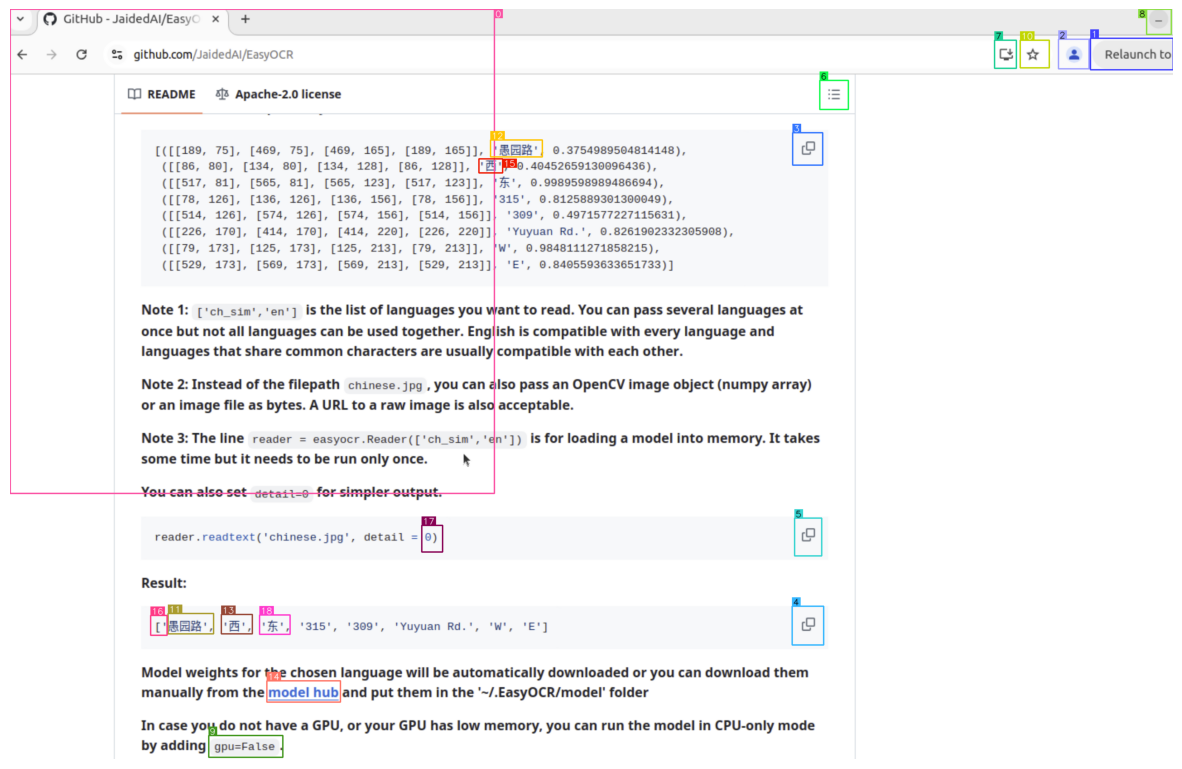

In [53]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
# print(len(parsed_content_list))


In [14]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,source,ID
0,text,"[0.1500781625509262, 0.011121409013867378, 0.3...",False,Document 10.docx General* Last Modified: Jus...,box_ocr_content_ocr,0
1,text,"[0.034392911940813065, 0.04726598784327507, 0....",False,Home,box_ocr_content_ocr,1
2,text,"[0.22094841301441193, 0.048192769289016724, 0....",False,Mailings,box_ocr_content_ocr,2
3,text,"[0.2595101594924927, 0.05004633963108063, 0.28...",False,Review,box_ocr_content_ocr,3
4,text,"[0.31474727392196655, 0.05004633963108063, 0.3...",False,Help,box_ocr_content_ocr,4
...,...,...,...,...,...,...
123,icon,"[0.9390129446983337, 0.9358046650886536, 0.946...",True,Adding a new item or element.,box_yolo_content_yolo,123
124,icon,"[0.27768561244010925, 0.14850999414920807, 0.2...",True,Paragraph Options,box_yolo_content_yolo,124
125,icon,"[0.3195086717605591, 0.3229200839996338, 0.332...",True,a blank space.,box_yolo_content_yolo,125
126,icon,"[0.08737725764513016, 0.14849473536014557, 0.0...",True,Paragraph Options,box_yolo_content_yolo,126


In [15]:
parsed_content_list

[{'type': 'text',
  'bbox': [0.1500781625509262,
   0.011121409013867378,
   0.3272537887096405,
   0.03521779552102089],
  'interactivity': False,
  'content': 'Document 10.docx  General*  Last Modified: Just now ',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.034392911940813065,
   0.04726598784327507,
   0.05523710325360298,
   0.07228915393352509],
  'interactivity': False,
  'content': 'Home',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.22094841301441193,
   0.048192769289016724,
   0.2542991042137146,
   0.07321593910455704],
  'interactivity': False,
  'content': 'Mailings',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.2595101594924927,
   0.05004633963108063,
   0.2845231890678406,
   0.07136237621307373],
  'interactivity': False,
  'content': 'Review',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.31474727392196655,
   0.05004633963108063,
   0.3335070312023163,
   0.07136237621307373],
  